Dimensiones del dataset: (980, 11)

Nombres de las columnas:
1. Unique user id
2. Average user feedback on art galleries
3. Average user feedback on dance clubs
4. Average user feedback on juice bars
5. Average user feedback on restaurants
6. Average user feedback on museums
7. Average user feedback on resorts
8. Average user feedback on parks/picnic spots
9. Average user feedback on beaches
10. Average user feedback on theaters
11. Average user feedback on religious institutions

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unique user id                                   980 non-null    object 
 1   Average user feedback on art galleries           980 non-null    float64
 2   Average user feedback on dance clubs             980 non-null    fl

C:\Users\elpra\AppData\Local\Temp\ipykernel_20640\1605823522.py:105: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada * 100,


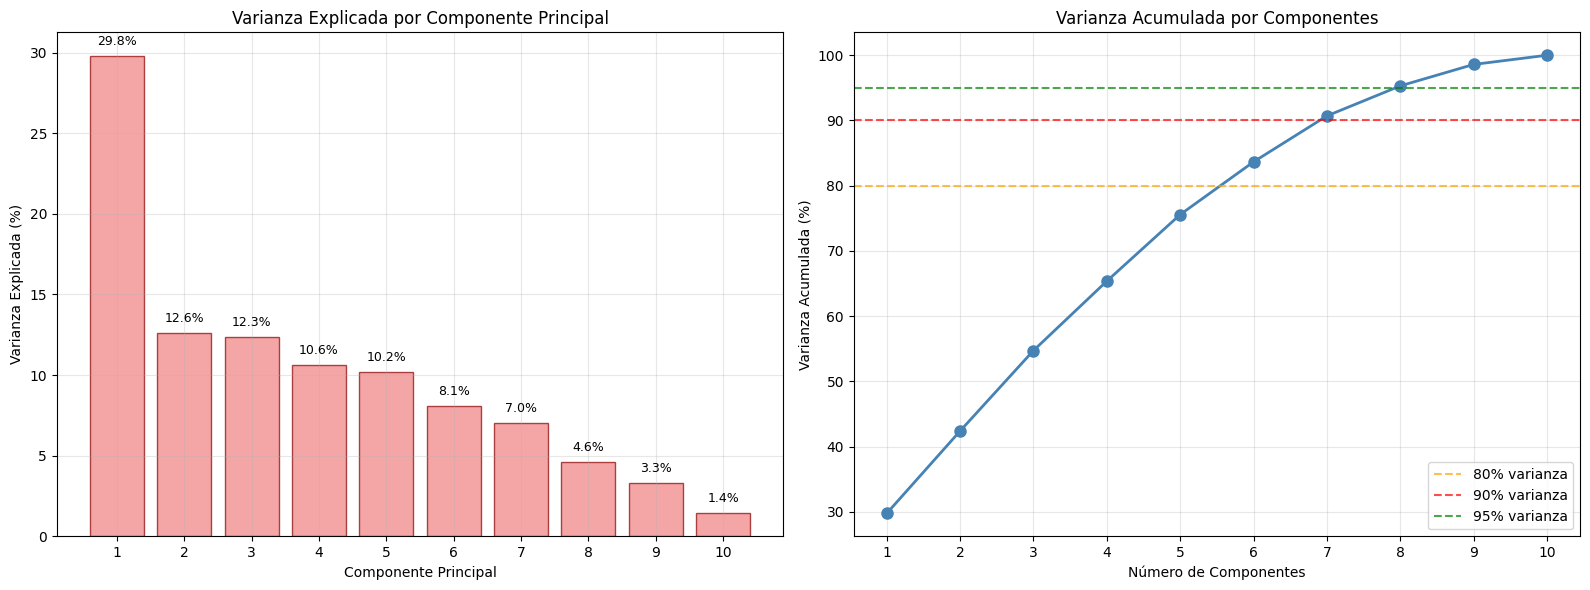


Dimensiones después de PCA: (980, 7)
Reducción dimensional: 10 → 7 variables

Primeras filas del dataset transformado:
  Unique user id       PC1       PC2       PC3       PC4       PC5       PC6  \
0         User 1  2.407573 -0.073039  0.185360  0.162400 -0.840662  0.920314   
1         User 2  5.311237 -0.022500  0.654836 -0.034982 -0.225704  1.902050   
2         User 3 -0.807839 -1.776951 -0.850661  0.750597 -0.646349 -0.300083   
3         User 4 -1.065346  0.856401  0.958654  0.126355 -1.201367 -0.782680   
4         User 5  0.987246 -0.076777  0.738679 -0.849947  0.849537 -1.401990   

        PC7  
0  0.414859  
1  0.303242  
2 -0.155406  
3  0.949553  
4 -0.568379  

CARGAS DE LAS VARIABLES EN LOS COMPONENTES PRINCIPALES
                                                   PC1    PC2    PC3    PC4  \
Average user feedback on art galleries          -0.015 -0.319 -0.520  0.414   
Average user feedback on dance clubs             0.130  0.297  0.603  0.179   
Average user feedback 

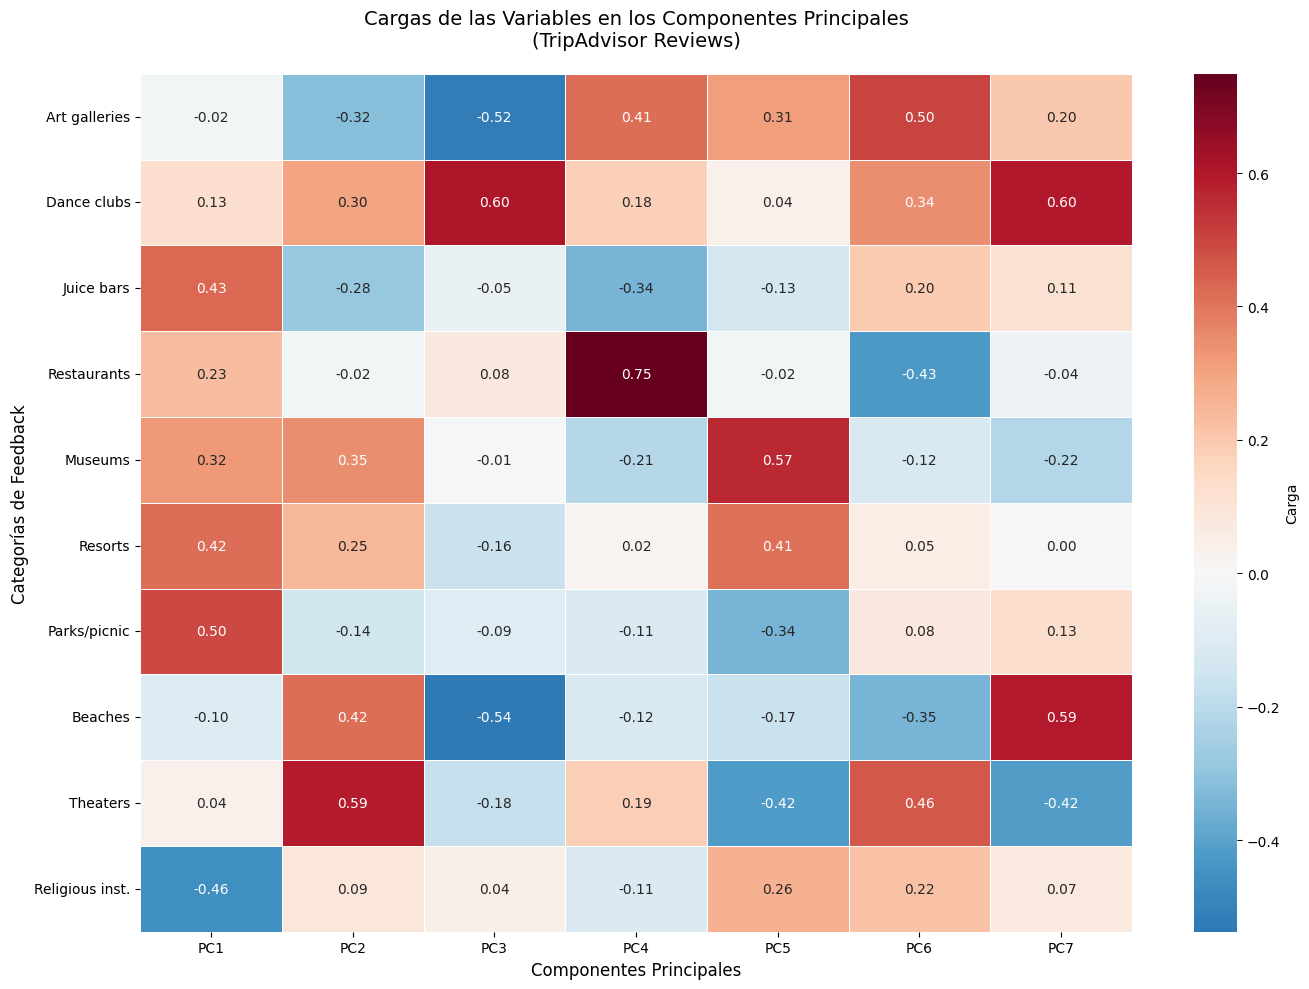

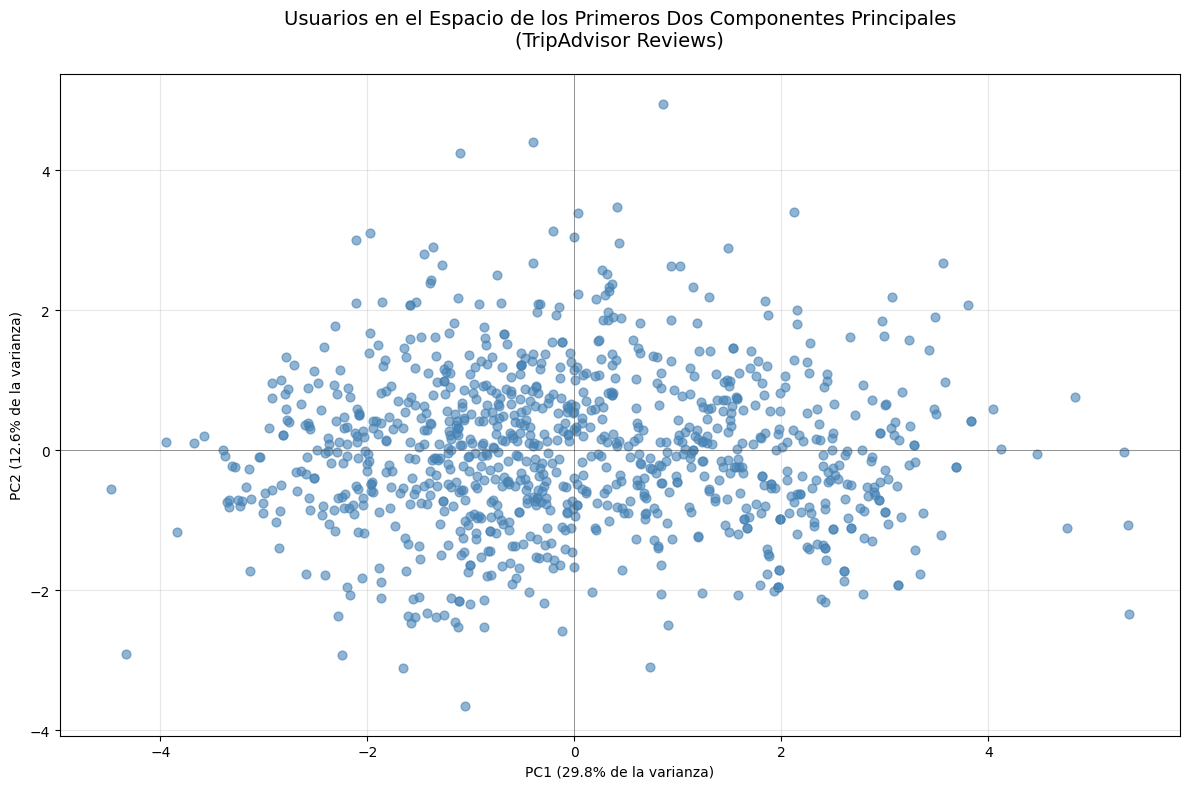

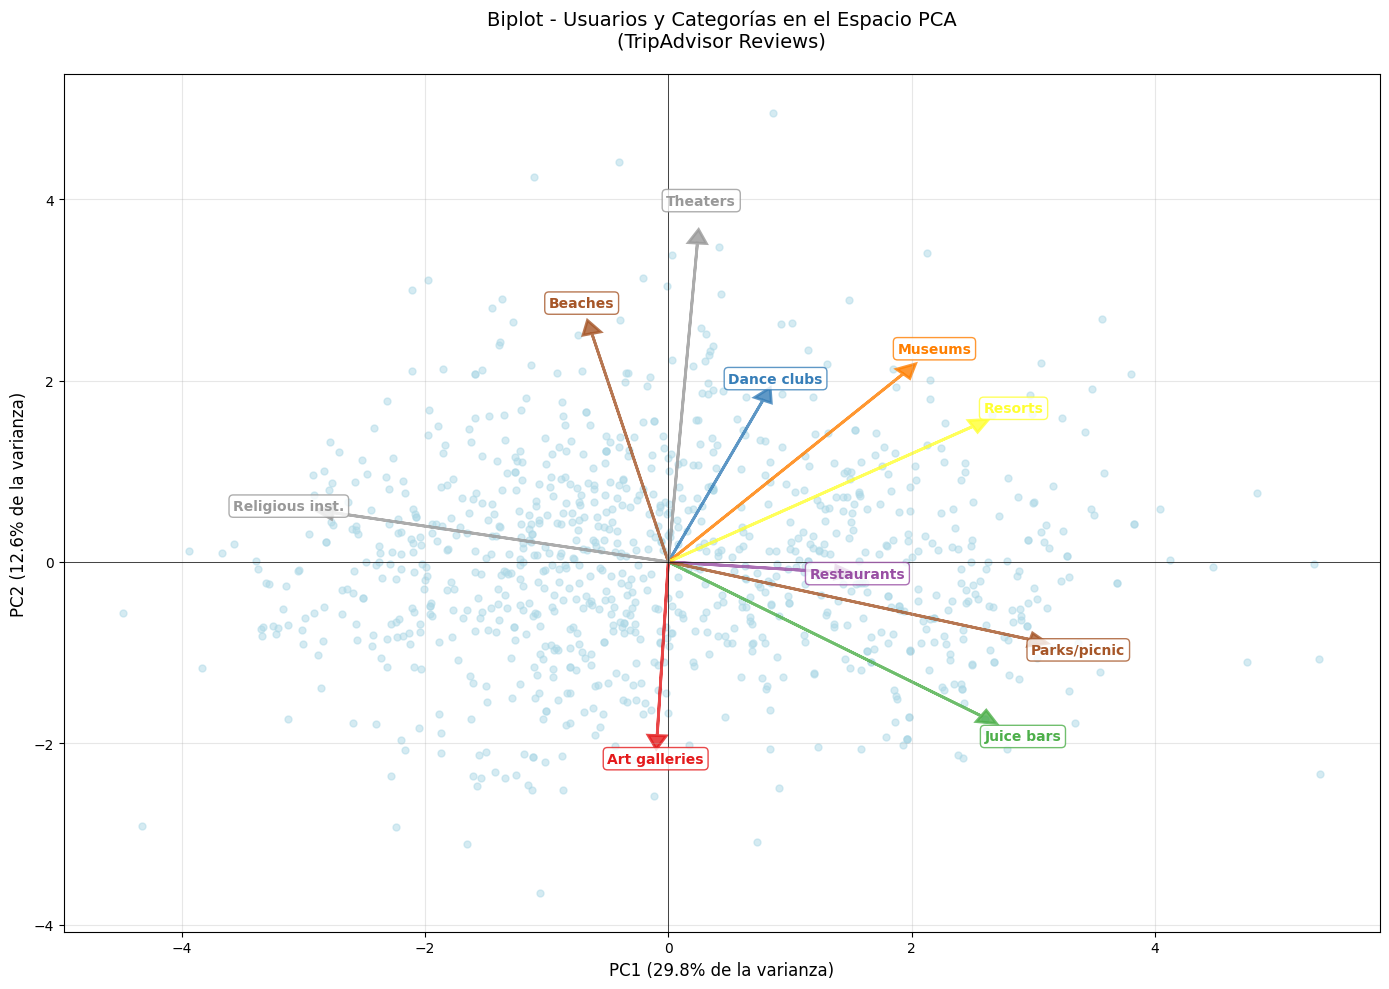


INTERPRETACIÓN DE LOS COMPONENTES PRINCIPALES

📊 COMPONENTE PRINCIPAL 1 (PC1):
   Varianza explicada: 29.78%
   Varianza acumulada: 29.78%

   🔍 Variables más influyentes:
      1. 📈 Parks/Picnic Spots: +0.496
      2. 📉 Religious Institutions: -0.459
      3. 📈 Juice Bars: +0.429
      4. 📈 Resorts: +0.417
      5. 📈 Museums: +0.322

   💡 Interpretación:
      - Usuarios con alta puntuación tienden a valorar: parks/picnic spots, juice bars
      - Usuarios con baja puntuación tienden a valorar menos: religious institutions, beaches

📊 COMPONENTE PRINCIPAL 2 (PC2):
   Varianza explicada: 12.63%
   Varianza acumulada: 42.40%

   🔍 Variables más influyentes:
      1. 📈 Theaters: +0.586
      2. 📈 Beaches: +0.420
      3. 📈 Museums: +0.346
      4. 📉 Art Galleries: -0.319
      5. 📈 Dance Clubs: +0.297

   💡 Interpretación:
      - Usuarios con alta puntuación tienden a valorar: theaters, beaches
      - Usuarios con baja puntuación tienden a valorar menos: art galleries, juice bars

📊 C

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import joblib

# 1. Cargar los datos con nombres de columnas correctos
column_names = [
    'Unique user id',
    'Average user feedback on art galleries', 
    'Average user feedback on dance clubs',
    'Average user feedback on juice bars',
    'Average user feedback on restaurants',
    'Average user feedback on museums',
    'Average user feedback on resorts',
    'Average user feedback on parks/picnic spots',
    'Average user feedback on beaches',
    'Average user feedback on theaters',
    'Average user feedback on religious institutions'
]

df = pd.read_csv('tripadvisor_review.csv', names=column_names, header=0)

print("Dimensiones del dataset:", df.shape)
print("\nNombres de las columnas:")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")

print("\nInformación del dataset:")
print(df.info())
print("\nPrimeras filas:")
print(df.head())

# 2. Preparar datos para PCA (excluir la columna ID)
# Seleccionar solo las columnas de feedback (atributos 2-11)
feedback_columns = [
    'Average user feedback on art galleries', 
    'Average user feedback on dance clubs',
    'Average user feedback on juice bars',
    'Average user feedback on restaurants',
    'Average user feedback on museums',
    'Average user feedback on resorts',
    'Average user feedback on parks/picnic spots',
    'Average user feedback on beaches',
    'Average user feedback on theaters',
    'Average user feedback on religious institutions'
]

df_feedback = df[feedback_columns]
print(f"\nDatos para PCA - forma: {df_feedback.shape}")
print("\nEstadísticas descriptivas:")
print(df_feedback.describe())

# 3. Crear Pipeline para reutilización en producción
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

# Ajustar el pipeline completo para análisis
pca_pipeline.fit(df_feedback)

# 4. Análisis de varianza explicada usando el pipeline
pca_full = pca_pipeline.named_steps['pca']
varianza_explicada = pca_full.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

print("\n" + "="*70)
print("ANÁLISIS DE VARIANZA EXPLICADA")
print("="*70)
for i, var in enumerate(varianza_explicada):
    print(f"PC{i+1}: {var*100:.2f}% (Acumulada: {varianza_acumulada[i]*100:.2f}%)")

# 5. Determinar número óptimo de componentes
n_componentes_80 = np.argmax(varianza_acumulada >= 0.80) + 1
n_componentes_90 = np.argmax(varianza_acumulada >= 0.90) + 1
n_componentes_95 = np.argmax(varianza_acumulada >= 0.95) + 1

print(f"\nComponentes para 80% varianza: {n_componentes_80}")
print(f"Componentes para 90% varianza: {n_componentes_90}")
print(f"Componentes para 95% varianza: {n_componentes_95}")

# 6. Visualización de varianza explicada (usando pca_full para consistencia)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
bars = ax1.bar(range(1, len(varianza_explicada) + 1), varianza_explicada * 100, 
               alpha=0.7, color='lightcoral', edgecolor='darkred')
ax1.set_xlabel('Componente Principal')
ax1.set_ylabel('Varianza Explicada (%)')
ax1.set_title('Varianza Explicada por Componente Principal')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(1, len(varianza_explicada) + 1))

# Añadir valores sobre las barras usando pca_full
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Gráfico de varianza acumulada
ax2.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada * 100, 
         'bo-', markersize=8, linewidth=2, color='steelblue')
ax2.axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='80% varianza')
ax2.axhline(y=90, color='red', linestyle='--', alpha=0.7, label='90% varianza')
ax2.axhline(y=95, color='green', linestyle='--', alpha=0.7, label='95% varianza')
ax2.set_xlabel('Número de Componentes')
ax2.set_ylabel('Varianza Acumulada (%)')
ax2.set_title('Varianza Acumulada por Componentes')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(1, len(varianza_acumulada) + 1))

plt.tight_layout()
plt.show()

# 7. Crear pipeline optimizado para el número de componentes seleccionado
pca_optimized = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_componentes_90))
])

# Transformar datos con el pipeline optimizado
df_pca = pca_optimized.fit_transform(df_feedback)

print(f"\nDimensiones después de PCA: {df_pca.shape}")
print(f"Reducción dimensional: {df_feedback.shape[1]} → {df_pca.shape[1]} variables")

# 8. Crear DataFrame con los componentes principales
columnas_pca = [f'PC{i+1}' for i in range(n_componentes_90)]
df_pca_resultado = pd.DataFrame(df_pca, columns=columnas_pca)
# Añadir la columna de ID de usuario
df_pca_resultado.insert(0, 'Unique user id', df['Unique user id'].values)

print("\nPrimeras filas del dataset transformado:")
print(df_pca_resultado.head())

# 9. Análisis de cargas (loadings) usando el pipeline optimizado
pca_reducido = pca_optimized.named_steps['pca']
loadings = pd.DataFrame(
    pca_reducido.components_.T,
    columns=columnas_pca,
    index=feedback_columns
)

print("\n" + "="*70)
print("CARGAS DE LAS VARIABLES EN LOS COMPONENTES PRINCIPALES")
print("="*70)
print(loadings.round(3))

# 10. Etiquetas cortas para mejor visualización
short_labels = [
    'Art galleries',
    'Dance clubs', 
    'Juice bars',
    'Restaurants',
    'Museums',
    'Resorts',
    'Parks/picnic',
    'Beaches',
    'Theaters',
    'Religious inst.'
]

# 11. Visualización de cargas con etiquetas cortas
plt.figure(figsize=(14, 10))
loadings_display = loadings.copy()
loadings_display.index = short_labels

sns.heatmap(loadings_display, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Carga'},
            annot_kws={'size': 10})
plt.title('Cargas de las Variables en los Componentes Principales\n(TripAdvisor Reviews)', 
          fontsize=14, pad=20)
plt.xlabel('Componentes Principales', fontsize=12)
plt.ylabel('Categorías de Feedback', fontsize=12)
plt.tight_layout()
plt.show()

# 12. Scatter plot sin warnings (evitar edgecolors/linewidth)
plt.figure(figsize=(12, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.6, s=40, c='steelblue')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.1f}% de la varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.1f}% de la varianza)')
plt.title('Usuarios en el Espacio de los Primeros Dos Componentes Principales\n(TripAdvisor Reviews)', 
          fontsize=14, pad=20)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5, alpha=0.5)
plt.axvline(x=0, color='k', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

# 13. Biplot mejorado usando pca_reducido para consistencia
def crear_biplot_tripadvisor(score, coeff, labels=None, pc1=0, pc2=1):
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Scatter plot de las observaciones (usuarios)
    xs = score[:, pc1]
    ys = score[:, pc2]
    ax.scatter(xs, ys, alpha=0.5, s=25, c='lightblue')
    
    # Vectores de las variables (categorías)
    colors = plt.cm.Set1(np.linspace(0, 1, len(labels)))
    
    for i, (label, color) in enumerate(zip(labels, colors)):
        ax.arrow(0, 0, coeff[i, pc1]*6, coeff[i, pc2]*6, 
                color=color, alpha=0.8, head_width=0.15, head_length=0.15,
                linewidth=2)
        
        ax.text(coeff[i, pc1]*6.8, coeff[i, pc2]*6.8, label, 
               color=color, ha='center', va='center', fontsize=10, 
               fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                        alpha=0.8, edgecolor=color))
    
    # Usar pca_reducido para consistencia en las etiquetas
    ax.set_xlabel(f'PC{pc1+1} ({pca_reducido.explained_variance_ratio_[pc1]*100:.1f}% de la varianza)', 
                  fontsize=12)
    ax.set_ylabel(f'PC{pc2+1} ({pca_reducido.explained_variance_ratio_[pc2]*100:.1f}% de la varianza)', 
                  fontsize=12)
    ax.set_title('Biplot - Usuarios y Categorías en el Espacio PCA\n(TripAdvisor Reviews)', 
                fontsize=14, pad=20)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()

# Crear biplot usando pca_reducido
crear_biplot_tripadvisor(df_pca, pca_reducido.components_.T, labels=short_labels)

# 14. Interpretación detallada de componentes principales
print("\n" + "="*70)
print("INTERPRETACIÓN DE LOS COMPONENTES PRINCIPALES")
print("="*70)

for i in range(min(4, n_componentes_90)):  # Mostrar los primeros 4 componentes
    print(f"\n📊 COMPONENTE PRINCIPAL {i+1} (PC{i+1}):")
    print(f"   Varianza explicada: {pca_reducido.explained_variance_ratio_[i]*100:.2f}%")
    print(f"   Varianza acumulada: {np.cumsum(pca_reducido.explained_variance_ratio_)[i]*100:.2f}%")
    
    # Variables con mayor carga (positiva y negativa)
    cargas_comp = loadings.iloc[:, i]
    cargas_abs = cargas_comp.abs().sort_values(ascending=False)
    
    print(f"\n   🔍 Variables más influyentes:")
    for j, var in enumerate(cargas_abs.head(5).index):
        carga = cargas_comp[var]
        signo = "📈" if carga > 0 else "📉"
        categoria = var.replace('Average user feedback on ', '').title()
        print(f"      {j+1}. {signo} {categoria}: {carga:+.3f}")
    
    # Interpretación del componente
    print(f"\n   💡 Interpretación:")
    top_positive = cargas_comp[cargas_comp > 0].sort_values(ascending=False).head(2)
    top_negative = cargas_comp[cargas_comp < 0].sort_values().head(2)
    
    if len(top_positive) > 0:
        pos_cats = [cat.replace('Average user feedback on ', '') for cat in top_positive.index]
        print(f"      - Usuarios con alta puntuación tienden a valorar: {', '.join(pos_cats)}")
    
    if len(top_negative) > 0:
        neg_cats = [cat.replace('Average user feedback on ', '') for cat in top_negative.index]
        print(f"      - Usuarios con baja puntuación tienden a valorar menos: {', '.join(neg_cats)}")

# 15. Exportar métricas como CSV para informes y reutilización
metrics_df = pd.DataFrame({
    'Component': [f"PC{i+1}" for i in range(len(varianza_explicada))],
    'Explained_Variance': varianza_explicada,
    'Explained_Variance_Ratio_Cum': varianza_acumulada
})
metrics_df.to_csv("tripadvisor_pca_variance.csv", index=False)
loadings.round(4).to_csv("tripadvisor_pca_loadings.csv")

# 16. Guardar la proyección con nombre estándar
df_pca_resultado.to_csv("tripadvisor_pca_projection.csv", index=False)

# 17. Guardar pipeline completo para reutilización en producción
joblib.dump(pca_optimized, 'tripadvisor_pca_pipeline.joblib')

# 18. Análisis de calidad de la reducción dimensional
datos_reconstruidos = pca_optimized.inverse_transform(df_pca)

# Error de reconstrucción por variable
errores_por_variable = np.mean((df_feedback.values - datos_reconstruidos)**2, axis=0)
error_promedio = np.mean(errores_por_variable)

print(f"\n" + "="*70)
print("CALIDAD DE LA REDUCCIÓN DIMENSIONAL")
print("="*70)
print(f"Error cuadrático medio general: {error_promedio:.6f}")
print(f"Varianza preservada: {np.cumsum(pca_reducido.explained_variance_ratio_)[-1]*100:.2f}%")

print("\nErrores por categoría:")
for i, col in enumerate(short_labels):
    print(f"  {col}: {errores_por_variable[i]:.6f}")

print(f"\n" + "="*70)
print("ARCHIVOS GENERADOS")
print("="*70)
print("✅ tripadvisor_pca_projection.csv - Proyección de datos con PCA")
print("✅ tripadvisor_pca_loadings.csv - Cargas de las variables por componente")
print("✅ tripadvisor_pca_variance.csv - Métricas de varianza explicada")
print("✅ tripadvisor_pca_pipeline.joblib - Pipeline completo para reutilización")

# 19. Ejemplo de reutilización del pipeline (para clustering/clasificación posterior)
print(f"\n" + "="*50)
print("EJEMPLO DE REUTILIZACIÓN DEL PIPELINE")
print("="*50)
print("# Para cargar y usar el pipeline en producción:")
print("import joblib")
print("pca_pipeline = joblib.load('tripadvisor_pca_pipeline.joblib')")
print("nuevos_datos_transformados = pca_pipeline.transform(nuevos_datos)")

print(f"\n🎉 ANÁLISIS PCA COMPLETADO EXITOSAMENTE")
print(f"   Reducción: {df_feedback.shape[1]} → {n_componentes_90} dimensiones")
print(f"   Varianza preservada: {np.cumsum(pca_reducido.explained_variance_ratio_)[-1]*100:.1f}%")
print(f"   Pipeline guardado para reutilización en producción")